..# Worksheet 4
### Each question is worth 10 marks. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from random import random
from scipy.fft import fft, fftshift, fftfreq
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],
})
plt.rc('font', size=12) 


1. Consider a two-qubit system with Hamiltonian $$\hat{H} = \sum_{j=1}^2\frac{\hbar\omega_0}{2}\hat{\sigma}_j^z,$$ where $\hat{\sigma}^z_1 = \hat{\sigma}_z\otimes \hat{\mathbb{1}}$ and $\hat{\sigma}^z_2 = \hat{\mathbb{1}}\otimes \hat{\sigma}_z.$ The Bell basis for this two-qubit system consists of the four maximally entangled states $$|\Phi^\pm\rangle = \frac{1}{\sqrt{2}} \left( |00\rangle \pm |11\rangle \right),\qquad |\Psi^\pm\rangle = \frac{1}{\sqrt{2}} \left( |01\rangle \pm |10\rangle \right),$$ using the shorthand $|ss'\rangle = |s\rangle\otimes |s'\rangle$, with $|s\rangle$ the eigenstates of $\hat{\sigma}_z$ such that $\hat{\sigma}_z|s\rangle = (-1)^s|s\rangle$. 

    (a) The dynamics of the two-qubit system under local dephasing is given by the Lindblad equation $$\frac{\rm d}{{\rm d}t} \hat{\rho} = \frac{1}{{\rm i}\hbar} [ \hat{H},\hat{\rho}] + \gamma\mathcal{D}[\hat{\sigma}_1^z]\hat{\rho} + \gamma \mathcal{D}[\hat{\sigma}_2^z]\hat{\rho},$$ where $\mathcal{D}[\hat{L}]\hat{\rho} = \hat{L}\hat{\rho}\hat{L}^\dagger - \tfrac{1}{2}\{\hat{L}^\dagger\hat{L},\hat{\rho}\}$ denotes a Lindblad dissipator. Analytically compute the time evolution of the density matrix for each of the four Bell states, i.e. starting from the pure initial condition $\hat{\rho}(0) = |\psi(0)\rangle\langle \psi(0)|$, with $|\psi(0)\rangle$ a Bell state. 
    
    (b) Collective dephasing due to a common bath is described by the Lindblad equation $$\frac{\rm d}{{\rm d}t} \hat{\rho} = \frac{1}{{\rm i}\hbar} [ \hat{H},\hat{\rho}]+\gamma \mathcal{D}[\hat{\sigma}_1^z+\hat{\sigma}_2^z]\hat{\rho}.$$ Analytically compute the time evolution of the density matrix for each of the four Bell states under collective dephasing. 
    
    (c) Comment briefly on the potential of the Bell basis states for robust encoding of quantum information in the presence of either local or collective dephasing. 

2. Consider an $M$-mode system described by the quadratic Hamiltonian $$ \hat{H} = \sum_{j,k=0}^{M-1} H_{jk}\hat{a}_j^\dagger\hat{a}_k + \sum_{j=0}^{M-1} {\rm i \hbar}\left(F_j\hat{a}^\dagger_j- F_j^*\hat{a}_j\right).$$ 
    (a) Show that the correlation matrix $C_{jk} = \langle\!\langle \hat{a}_k^\dagger \hat{a}_j\rangle\!\rangle$ and the displacement vector $d_j = \langle \hat{a}_j\rangle$ obey the equations of motion $$\frac{{\rm d}}{{\rm d}t}\mathbf{d} = \frac{1}{{\rm i}\hbar} \mathbf{H}\cdot \mathbf{d} + \mathbf{F},\qquad  \frac{\rm d}{\rm dt} \mathbf{C} = \frac{1}{{\rm i}\hbar}[\mathbf{H},\mathbf{C}].$$
    
    (b) Suppose now that the system undergoes linear dissipation described by the master equation $$\frac{{\rm d}}{{\rm d}t} \hat{\rho} = \frac{1}{{\rm i}\hbar} [ \hat{H},\hat{\rho}] + \sum_{j,k=0}^{M-1}\left[ \Gamma_{jk}^-\left( \hat{a}_j\hat{\rho}\hat{a}_k^\dagger - \tfrac{1}{2}\{\hat{a}_k^\dagger\hat{a}_j, \hat{\rho}\} \right) + \Gamma_{jk}^+\left( \hat{a}^\dagger_j\hat{\rho}\hat{a}_k - \tfrac{1}{2}\{\hat{a}_k\hat{a}^\dagger_j, \hat{\rho}\} \right)\right].$$ Show that the corresponding equations of motion are of the form $$\frac{{\rm d}}{{\rm d}t}\mathbf{d} =  \mathbf{G}\cdot \mathbf{d} + \mathbf{F},\qquad \frac{\rm d}{\rm dt} \mathbf{C} = \mathbf{G}\cdot \mathbf{C} + \mathbf{C}\cdot \mathbf{G}^\dagger + \mathbf{\Gamma}^+,$$ and find an expression for $\mathbf{G}$.
    
    (c) Consider a coupled two-mode system where only the first mode is damped and the second mode is forced:
    $$\mathbf{H} = \begin{pmatrix}
   \hbar \omega_0 & \hbar g \\
    \hbar g & \hbar \omega_0
    \end{pmatrix},\qquad \mathbf{F} = \begin{pmatrix}
   0 \\
    f_1
    \end{pmatrix}, \qquad \mathbf{\Gamma}^- = \begin{pmatrix}
    \gamma_0 & 0 \\
    0 & 0
    \end{pmatrix}, \qquad \mathbf{\Gamma}^+ = \begin{pmatrix}
    0 & 0 \\
    0 & 0
    \end{pmatrix}.$$
    Find the steady-state solution for the displacement vector $\mathbf{d}$ and the correlation matrix $\mathbf{C}$. Comment briefly on the physical interpretation of your result.   

3. A linear superoperator can be built up in terms of the elementary superoperators $$\mathcal{M}_L[\hat{A}]\hat{\rho} = \hat{A}\hat{\rho},\qquad \mathcal{M}_R[\hat{A}]\hat{\rho} = \hat{\rho}\hat{A},$$ describing "left-multiplication" and "right-multiplication" by some operator $\hat{A}$. (In the lecture these superoperators were denoted by $\mathcal{A}_L$ and $\mathcal{A}_R$ but the above notation is somewhat more flexible.)

    (a) Prove that $\mathcal{M}_L[\hat{A}]$ and $\mathcal{M}_R[\hat{B}]$ commute, i.e. $\mathcal{M}_L[\hat{A}]\mathcal{M}_R[\hat{B}]\hat{\rho} = \mathcal{M}_R[\hat{B}]\mathcal{M}_L[\hat{A}]\hat{\rho}$. 

    (b) Consider an orthonormal basis of the quantum ket space $\{|i\rangle\}$, which induces an orthonormal basis of the operator space $\{\hat{e}_{ij} = |i\rangle\langle j|\}$. A convenient procedure for vectorisation is the mapping $\hat{e}_{ij} = |i\rangle\langle j| \to |i\rangle\otimes |j\rangle \equiv |e_{ij}\rangle\!\rangle$. Show that with this vectorisation procedure, superoperators are mapped to the operators $$\mathcal{M}_L[\hat{A}] \to \hat{A}\otimes \hat{\mathbb{1}}, \qquad \mathcal{M}_R[\hat{A}] \to  \hat{\mathbb{1}} \otimes \hat{A}^T,$$ where $^T$ denotes the matrix transpose, i.e. $[A^T]_{ij} = A_{ji}$.     
    
    (c) Write down the Hamiltonian generator $\mathcal{H}\hat{\rho} = [\hat{H},\hat{\rho}]$ in terms of these elementary superoperators. Show that $\mathcal{H}$ is a Hermitian (self-adjoint) superoperator. Thus prove that the time evolution superoperator $\mathcal{U}(t) = {\rm e}^{-{\rm i}\mathcal{H}t/\hbar}$ is unitary. 
   
   (d) Find an expression for the time evolution superoperator in terms of the elementary operations $\mathcal{M}_L$ and $\mathcal{M}_R$.
   
   (e) Now consider a Liouvillian of the form $$\mathcal{L} = \frac{1}{{\rm i}\hbar}\mathcal{H}+\mathcal{D}[\hat{L}]$$ for some Lindblad operator $\hat{L}\neq 0$. Show that the corresponding time evolution operator ${\rm e}^{\mathcal{L}t}$ is not unitary.

4. Now let us construct a Liouvillian numerically. Consider the Lindblad equation for a qubit in a thermal bath $$ \frac{{\rm d}}{{\rm d}t} \hat{\rho} = \frac{1}{{\rm i}\hbar} [ \hat{H},\hat{\rho}] + \gamma (1+\bar{n})\mathcal{D}[\hat{\sigma}_-]\hat{\rho} + \gamma \bar{n} \mathcal{D}[\hat{\sigma}_+]\hat{\rho} = \mathcal{L}\hat{\rho},$$ where $\hat{H} = \hbar\omega_0 \hat{\sigma}_z/2$, $\bar{n} = ({\rm e}^{\beta\hbar\omega_0}-1)^{-1}$ and $\beta = 1/k_BT$ is the inverse temperature. Take the parameters to be $\omega_0=1$, $\gamma = 0.1\omega_0$ and $k_BT = 0.5\hbar\omega_0$.

(a) The Pauli operator basis is defined by $\hat{e}_j = \hat{\sigma}_j/\sqrt{2}$, where $\{\hat{\sigma}_0,\hat{\sigma}_1,\hat{\sigma}_2,\hat{\sigma}_3\}= \{\hat{\mathbb{1}},\hat{\sigma}_x,\hat{\sigma}_y,\hat{\sigma}_z\}$. Verify numerically that this forms an orthonormal basis with respect to the inner product $\langle \hat{e}_i,\hat{e}_j\rangle = {\rm tr}(\hat{e}_i^\dagger \hat{e}_j)$.

In [2]:
# Initialise elements of the Pauli operator basis

sig0 = np.eye(2)
sig1 = np.array([[0, 1], [1, 0]])
sig2 = 1j*np.array([[0, -1], [1, 0]])
sig3 = np.array([[1, 0], [0, -1]])

# Define an array of Pauli operators
sig = np.array([sig0,sig1, sig2, sig3])
# Define the Pauli basis
p_basis = sig/np.sqrt(2)

# Print all combinations of inner product
for i in range(len(sig)):
    for j in range(i, len(sig)):
        print(f'i = {i}, j = {j}, tr = {np.round(np.real(np.trace(p_basis[i]@p_basis[j])))}')


i = 0, j = 0, tr = 1.0
i = 0, j = 1, tr = 0.0
i = 0, j = 2, tr = 0.0
i = 0, j = 3, tr = 0.0
i = 1, j = 1, tr = 1.0
i = 1, j = 2, tr = 0.0
i = 1, j = 3, tr = 0.0
i = 2, j = 2, tr = 1.0
i = 2, j = 3, tr = 0.0
i = 3, j = 3, tr = 1.0


(b) Construct and print the Liouvillian operator $\hat{\mathcal{L}}$ as a NumPy array in the Pauli basis.

In [3]:
# Set the question parameters
h_bar = 1
w0 =1
gamma = 0.1*w0
kT = 0.5*h_bar*w0
sig_plus = (sig[1] + 1j*sig[2])/2
sig_minus = (sig[1] - 1j*sig[2])/2

In [4]:
def D_p(A, rho):
    
    """
    Return the dissipator term between the operator A and the state rho
    
    
    :param H ndarray: A matrix representing the associated Hamiltonian

    :return ndarray: A ndarray representing matrix form of the Liouvillian operator
    """
    
    return A@rho@A.T.conjugate() - 0.5*(A.T.conjugate()@A@rho + rho@(A.T.conjugate())@A)
    

def liouvillian_4(H, basis = p_basis, sig_plus = sig_plus, sig_minus = sig_minus,
                w0 = w0, gamma = gamma, kT = kT, h_bar = h_bar):
    
    """
    Return the matrix form of the Liouvillian given in question 4
    
    :param H ndarray: A matrix representing the associated Hamiltonian
    :param basis ndarray: An array containing the vector components of the Pauli basis
    :param sig_plus ndarray: A matrix representing the Pauli + operator
    :param sig_minus ndarray: A matrix representing the Pauli - operator
    :param w0 ndarray: A constant associated with the systems Lindblad equation
    :param gamma ndarray: A constant associated with the systems Lindblad equation
    :param kT ndarray: A constant associated with the systems Lindblad equation
    :param h_bar ndarray: A constant associated with the systems Lindblad equation
    
    :return ndarray: A ndarray representing matrix form of the Liouvillian operator
    """
    
    # Calculate the constant n appearing in the Liouvillian
    n = 1/(np.exp(h_bar*w0*(1/kT)) - 1)
    
    # The shape of the Liouvillian will be dxd
    d = len(sig)
    # Initialise a matrix to store the matrix elememts of the Liouvillian
    L = np.zeros(d**2, dtype = complex).reshape(d, d)
    # For each basis element
    for i in range(d):
        ei = basis[i]
        # Loop over every other basis element and calculate the inner product of the first with 
        # the result of acting with the Liouvillian on the second
        for j in range(d):
            ej = basis[j]
            # Calculate the three terms in the Liouvillian
            t1 = (1/(1j*h_bar))*(H@ej - ej@H)
            t2 = gamma*(1+n)*D_p(sig_minus, ej)
            t3 = gamma*(n)*D_p(sig_plus, ej)
            
            # Finally, take the trace to find the matrix element
            L[i, j] = np.trace(ei@(t1 + t2 + t3))
    
    return L


In [5]:
# Define the Hamiltonian and find the Liouvillian
H = (h_bar*w0/2)*sig[3]
L = liouvillian_4(H)
print(L)

[[ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.06565176+0.j -1.        +0.j  0.        +0.j]
 [ 0.        +0.j  1.        +0.j -0.06565176+0.j  0.        +0.j]
 [-0.1       +0.j  0.        +0.j  0.        +0.j -0.13130353+0.j]]


(c) Find the eigenvalues and right eigenvectors of $\hat{\mathcal{L}}$. Print the numerically obtained eigenvectors in their standard matrix form (i.e. expressed in the computational basis $|0\rangle$ and $|1\rangle$). Verify that the steady state is thermal as expected. Comment on the implications of these results for the time evolution of the qubit.

In [6]:
# Calculate the eigenvalues and eigencectors of the Liouvillian
eig_vals, eig_vecs = np.linalg.eig(L)

# Print the eigenvalues and eigencectors in the Pauli operator basis
for i in range(len(eig_vals)):
    print(f'Eigenvalue = {eig_vals[i]}\nEigenvector = {eig_vecs[:, i]}\n')

# Print the eigenvalues and eigencectors in standard matrix form
print('########## Standard matrix form ########## \n')
for i in range(len(eig_vals)):
    eig_vec = 0
    print(f'Eigenvalue = {eig_vals[i]}\n')
    for j in range(len(sig)):
        eig_vec += eig_vecs[j, i]*sig[j]
    print(f'Eigenvector = {eig_vec}\n')

Eigenvalue = (-0.06565176427496655+0.9999999999999996j)
Eigenvector = [-0.        +0.j         -0.        +0.70710678j  0.70710678+0.j
 -0.        +0.j        ]

Eigenvalue = (-0.0656517642749665-0.9999999999999997j)
Eigenvector = [0.00000000e+00-0.j         8.32667268e-17-0.70710678j
 7.07106781e-01+0.j         0.00000000e+00-0.j        ]

Eigenvalue = (-0.13130352854993313+0j)
Eigenvector = [0.+0.j 0.+0.j 0.+0.j 1.+0.j]

Eigenvalue = 0j
Eigenvector = [ 0.79555082+0.j  0.        +0.j  0.        +0.j -0.60588686+0.j]

########## Standard matrix form ########## 

Eigenvalue = (-0.06565176427496655+0.9999999999999996j)

Eigenvector = [[0.+0.00000000e+00j 0.-1.11022302e-16j]
 [0.+1.41421356e+00j 0.+0.00000000e+00j]]

Eigenvalue = (-0.0656517642749665-0.9999999999999997j)

Eigenvector = [[0.00000000e+00+0.j         8.32667268e-17-1.41421356j]
 [8.32667268e-17+0.j         0.00000000e+00+0.j        ]]

Eigenvalue = (-0.13130352854993313+0j)

Eigenvector = [[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j

In [7]:
# Thermal state is of the exponential form:
thermal_state = expm(-H/(kT))/np.trace(expm(-H/(kT)))

# The steady state will be the eigenvector corresponding to an eigenvalue of 0
# Get its index
steady_index = np.where(eig_vals == 0)[0][0]

# Retrieve the steady state vector
steady_eig = eig_vecs[:, steady_index]

# Convert the steady state vector to standard basis for comparison
steady_state = 0
for i in range(len(steady_eig)):
    steady_state += steady_eig[i]*sig[i]
# Normalise the steady state
steady_state = steady_state/np.trace(steady_state)

# This is the accuracy to which we will compare the two states
precision = 10
print(f'Thermal state:\n {thermal_state}\n')
print(f'Steady state:\n {steady_state}\n')
print(f'Component wise comparison\n {np.round(steady_state, precision) == np.round(thermal_state, precision)}')

Thermal state:
 [[0.11920292+0.j 0.        +0.j]
 [0.        +0.j 0.88079708+0.j]]

Steady state:
 [[0.11920292+0.j 0.        +0.j]
 [0.        +0.j 0.88079708+0.j]]

Component wise comparison
 [[ True  True]
 [ True  True]]


5. Now let us use the operator basis $\hat{e}_{ij} = |i\rangle \langle j|$ and the convenient vectorisation map $|i\rangle \langle j| \to |i\rangle\otimes |j\rangle$ to construct the Liouvillian.

(a) Write a function that takes an arbitrary operator as input and outputs its vectorised form, $$\hat{\rho} = \sum_{i,j}\rho_{ij} |i\rangle\langle j| \longrightarrow |\rho\rangle\!\rangle = \sum_{i,j}\rho_{ij} |i\rangle \otimes |j\rangle.$$ Test your function by generating and printing the vectorised form of the pure state $\hat{\rho}_0 = |\psi\rangle\langle \psi|$, where $|\psi\rangle = (|0\rangle + {\rm i}|1\rangle)/\sqrt{2}$. Output the expectation value ${\rm tr}(\hat{\sigma}_y\hat{\rho}_0) = \langle\!\langle \sigma_y|\rho_0\rangle\!\rangle$ using the vectorised form of $\hat{\rho}_0$ and $\hat{\sigma}_y$. 

In [43]:
# Set the |0> and |1> basis states
s0 = np.array([[1], [0]])
s1 = np.array([[0], [1]])

# Define the standard basis
s00 = s0@s0.T.conjugate()
s01 = s0@s1.T.conjugate()
s10 = s1@s0.T.conjugate()
s11 = s1@s1.T.conjugate()

s_basis = np.array([s00, s01, s10, s11])


def vectorise(A, basis = s_basis):
    """
    Return the vectorised form of a given operator A
    
    :param A ndarray: A matrix representing the operator A in the standard basis
    :param basis ndarray: An array whose elements constitute a basis in which to represent A by a vector
    :return ndarray: A ndarray representing the vectorised form of the operator A
    """

    vector_A = np.zeros(A.shape[0]*A.shape[1], dtype = complex)
    for i in range(len(basis)):
        vector_A[i] = np.trace(basis[i].T.conjugate()@A)

    return vector_A.reshape(-1, 1)


In [10]:
# Set the |0> and |1> basis states and Pauli Y matrix
s0 = np.array([[1], [0]])
s1 = np.array([[0], [1]])
py = sig[2]

#Initial state
phi = (s0 + 1j*s1)/(np.sqrt(2))
# Initial density operator
rho_0 = phi@phi.T.conjugate()
# Get vectorised for of denstiy operator
rho_0_vec = vectorise(rho_0)

print(f'Vectorised state: \n {rho_0_vec}\n')

# Get vectorised form of Pauli Y matrix
py_vec = vectorise(py)

# Compare trace (inner product) of the two matrices with the inner
# product of their vectorised form. These should be the same
print(f'Trace of operators:\n{np.trace(py@rho_0)}\n')
print(f'Inner product of vectorised forms\n{py_vec.T.conjugate()@rho_0_vec}')


Vectorised state: 
 [[0.5+0.j ]
 [0. -0.5j]
 [0. +0.5j]
 [0.5+0.j ]]

Trace of operators:
(0.9999999999999998+0j)

Inner product of vectorised forms
[[1.+0.j]]


(b) Write functions that generate the matrix representation of the left- and right-multiplication superoperators, $\hat{\mathcal{M}}_L[\hat{A}]$ and $\hat{\mathcal{M}}_R[\hat{A}]$, for an arbitrary operator $\hat{A}$ (see question 3). Use these functions to construct the Hamiltonian superoperator $\mathcal{H} = [\hat{H},\bullet]$ for a qubit with $\hat{H} = \hat{\sigma}_z/2$, and verify that $\mathcal{H}$ is Hermitian. 

In [11]:
# We seen that these operators get mapped to a tensor product
def M_L(A):
    """
    Return the left multiplication superoperator form of a given operator A
    
    :param A ndarray: A matrix representing the operator A in the e_ij basis
    :return ndarray: A ndarray representing left multiplication superoperator form of the operator A
    """
    # Dimenstion of the operator A
    d = A.shape[0]
    
    # Return the tensor product of A with the identity
    return np.kron(A, np.eye(d))

def M_R(A):
    """
    Return the right multiplication superoperator form of a given operator A
    
    :param A ndarray: A matrix representing the operator A in the e_ij basis
    :return ndarray: A ndarray representing right multiplication superoperator form of the operator A
    """
    # Dimenstion of the operator A
    d = A.shape[0]
    
    # Return the tensor product of the identity with the transpose of A
    return np.kron(np.eye(d), A.T)

def super_Ham(H):
    """
    Return the rHamiltonian superoperator for Hamiltonian H
    
    :param H ndarray: The Hamiltonian matrix to be elevated to a superoperator
    :return ndarray: A ndarray representing the Hamiltonian superoperator of H
    """
    # Construct the superoperator
    super_H = M_L(H) - M_R(H)
    
    return super_H


def D(L):
    
    return M_L(L)@M_R(L.T.conjugate()) - 0.5*(M_L(L.T.conjugate())@M_L(L) + M_R(L)@M_R(L.T.conjugate()))


In [12]:
# Define the Hamiltonian
H = sig[3]/2

# Convert the Hamiltonian to a super operator
super_H = super_Ham(H)

# Print the Hamiltonian superoperator
print(f'Hamiltonian superoperator:\n{super_H}\n')

# Print the hermitian conjugate of the Hamiltonian superoperator
print(f'Hamiltonian superoperator hermitian conjugate:\n{super_H.T.conjugate()}\n')

# Component wise check of the Hamiltonian superoperator and its hermitian conjugate
print(f'Hermitian Check:\n{super_H == super_H.T.conjugate()}\n')



Hamiltonian superoperator:
[[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j  0.+0.j]]

Hamiltonian superoperator hermitian conjugate:
[[ 0.-0.j  0.-0.j  0.-0.j  0.-0.j]
 [ 0.-0.j  1.-0.j  0.-0.j  0.-0.j]
 [ 0.-0.j  0.-0.j -1.-0.j -0.-0.j]
 [ 0.-0.j  0.-0.j -0.-0.j  0.-0.j]]

Hermitian Check:
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]



(c) Construct the Liouvillian from the master equation in question 5 as a matrix in this basis. Verify numerically that its steady state is thermal.

In [13]:
def liouvillian_5(H, sig = sig, sig_plus = sig_plus, sig_minus = sig_minus,
                w0 = w0, gamma = gamma, kT = kT, h_bar = h_bar):
    
    """
    Return the matrix form of the Liouvillian given in question 4, in the standard basis
    
    :param H ndarray: A matrix representing the associated Hamiltonian
    :param sig ndarray: An array whose components are the Pauli operators
    :param sig_plus ndarray: A matrix representing the Pauli + operator
    :param sig_minus ndarray: A matrix representing the Pauli - operator
    :param w0 ndarray: A constant associated with the systems Lindblad equation
    :param gamma ndarray: A constant associated with the systems Lindblad equation
    :param kT ndarray: A constant associated with the systems Lindblad equation
    :param h_bar ndarray: A constant associated with the systems Lindblad equation
    
    :return ndarray: A ndarray representing matrix form of the Liouvillian operator in the standard basis
    """
    
    # Calculate the constant n appearing in the Liouvillian
    n = 1/(np.exp(h_bar*w0*(1/kT)) - 1)
    
    # Calculate the superoperator form of the Hamiltonian
    super_H = super_Ham(H)
    #D_sig_minus = M_L(sig_minus)@M_R(sig_plus) - 0.5*(M_L(sig_plus)@M_L(sig_minus) + M_R(sig_minus)@M_R(sig_plus))
    #D_sig_plus = M_L(sig_plus)@M_R(sig_minus) - 0.5*(M_L(sig_minus)@M_L(sig_plus) + M_R(sig_plus)@M_R(sig_minus))
    
    # Calculate the full Liouvillian
    L = (1/(1j*h_bar))*super_H + gamma*(1+n)*D(sig_minus) + gamma*(n)*D(sig_plus)
    #L = (1/(1j*h_bar))*super_H + gamma*(1+n)*D_sig_minus + gamma*(n)*D_sig_plus

    return L

# Define the Hamiltonian
H = (h_bar*w0/2)*sig[3]
# Calculate the Liouvillian for this Hamiltonian
L = liouvillian_5(H)
print(f'Liouvillian:\n{L}\n')

# Calculate the eigenvalues and eigenvectors of the Liouvillian
eig_vals, eig_vecs = np.linalg.eig(L)

# Print the eigenvalues and eigenvectors of the Liouvillian
for i in range(len(eig_vals)):
    print(f'Eigenvalue = {eig_vals[i]}\nEigenvector = {eig_vecs[:, i]}\n')
    

Liouvillian:
[[-0.11565176+0.j  0.        +0.j  0.        +0.j  0.01565176+0.j]
 [ 0.        +0.j -0.06565176-1.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j -0.06565176+1.j  0.        +0.j]
 [ 0.11565176+0.j  0.        +0.j  0.        +0.j -0.01565176+0.j]]

Eigenvalue = (-0.1313035285499331+0j)
Eigenvector = [-0.70710678-0.j -0.        -0.j -0.        -0.j  0.70710678+0.j]

Eigenvalue = (-3.4165762940007728e-18+0j)
Eigenvector = [0.13411268+0.j 0.        +0.j 0.        +0.j 0.99096609+0.j]

Eigenvalue = (-0.06565176427496658-1j)
Eigenvector = [0.+0.j 1.+0.j 0.+0.j 0.+0.j]

Eigenvalue = (-0.06565176427496658+1j)
Eigenvector = [0.+0.j 0.+0.j 1.+0.j 0.+0.j]



In [14]:
# This is the accuracy to which we will compare the two states
precision = 10

# Thermal state is of the exponential form:
thermal_state = expm(-H/(kT))/np.trace(expm(-H/(kT)))

# The steady state will be the eigenvector corresponding to an eigenvalue of 0
# Get its index
steady_index = np.where(np.round(eig_vals, precision) == 0)[0][0]

# Retrieve the steady state vector
steady_eig = eig_vecs[:, steady_index]

# Convert the steady state vector to standard basis for comparison
steady_state = steady_eig.reshape(2, 2)

# Normalise the steady state
steady_state = steady_state/np.trace(steady_state)

print(f'Thermal state:\n {thermal_state}\n')
print(f'Steady state:\n {steady_state}\n')
print(f'Component wise comparison\n {np.round(steady_state, precision) == np.round(thermal_state, precision)}')


Thermal state:
 [[0.11920292+0.j 0.        +0.j]
 [0.        +0.j 0.88079708+0.j]]

Steady state:
 [[0.11920292+0.j 0.        +0.j]
 [0.        +0.j 0.88079708+0.j]]

Component wise comparison
 [[ True  True]
 [ True  True]]


(d) Use your new functions to numerically simulate the time evolution under the master equation from question 5. Take the initial condition as $\hat{\rho}(0) = \hat{\rho}_0$  from part (a). Plot the expectation values of the three Pauli operators as a function of time. Choose an appropriate timestep $\Delta t$ and evolution time $t$ to illustrate the transient and long-time behaviour. Check that the normalisation of the density matrix is conserved.

In [15]:
def time_evo(U_dt, rho_0, t_tot, dt, obs, basis = s_basis):
    
    """
    Evolve an initial state rho_0 according to the evolution operator U_dt

    :param U_dt ndarray: A matrix representing the time evolution opertaor
    :param rho_0 ndarray: A matrix representing the initial state of the system
    :param t_tot int: The total time over which the system is to be evolved
    :param dt float: The size of the time step increment 
    :param obs list: A list of all operators whose expectation values are to be calculated
    :return t_axis ndarray: A ndarray containing the time value at each step in the evolution
    :return obs_exp ndarray: A ndarray containing expectation value of each observable
        in obs at each time step
    :return rho ndarray: A  matrix representing the final state of the system after evolution
    :return norm ndarray: A ndarray containing norm of the state at each time step
    """
        
    # Initialise variables
    n_steps = int(t_tot/dt)  # Number of timesteps to take
    n_obs = len(obs)         # Number of observables to compute at each timestep
    t = 0.0       # Initial time
    t_axis, obs_exp = np.zeros(n_steps+1), np.zeros([n_obs,n_steps+1]) # Time axis and observable expectation values
                                                                 # (n_steps+1 includes t=0)   
    # Vectorise the state
    rho = vectorise(rho_0, basis)
    
    # Vectorise the observables
    obs_list = []
    for ob in obs:
        obs_list.append(vectorise(ob, basis))
        
    # Normalisation
    norm = np.zeros(n_steps+1)
    
    # Loop over timesteps
    for i in range(n_steps):
        
        # Compute and store expectation values
        t_axis[i] = t
        norm[i] = np.real(rho.T.conjugate()@rho)
        for j in range(n_obs):
            this_obs = np.real(np.trace(obs_list[j].T.conjugate()@rho))
            obs_exp[j,i] = np.real(this_obs)
        
        # Take a step forward in time
        rho = U_dt@rho
        t += dt
    
    # Compute and store final expectation values
    t_axis[-1] = t
    norm[-1] = np.real(rho.T.conjugate()@rho)
    for j in range(n_obs):
        this_obs = np.real(np.trace(obs_list[j].T.conjugate()@rho))
        obs_exp[j,-1] = np.real(this_obs)
    
    return t_axis, obs_exp, rho, norm



findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


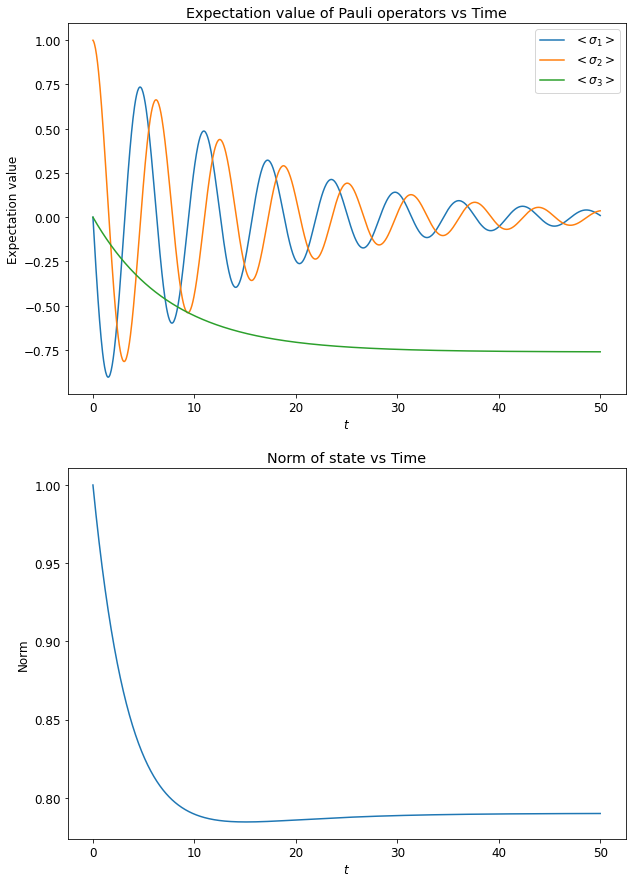

In [16]:
###########################################################################################
#    Note: Normalisation does not seem to be conserved, which to me makes sense ans L is 
#    not unitary in general (and indeed is not in this case) and the state seems to reduce
#    in size as time progresses
###########################################################################################
# Set the question parameters
dt = 0.05
t_tot = 50
U_dt = expm(L*dt)
# Add the desired observables to our list
obs = sig[1:]


# Carry out the time evolution
t_axis, obs_exp, rho_end, norm = time_evo(U_dt, rho_0, t_tot, dt, obs)

fig, ax = plt.subplots(2, figsize=(10, 15))

for i in range(len(obs)):
    ax[0].plot(t_axis, obs_exp[i], label = '$<\sigma_{%i}>$'%(i+1))
ax[0].set_xlabel('$ t $')
ax[0].set_ylabel('Expectation value')
ax[0].set_title('Expectation value of Pauli operators vs Time')
ax[0].legend()


ax[1].plot(t_axis, norm)
ax[1].set_xlabel('$ t $')
ax[1].set_ylabel('Norm')
ax[1].set_title('Norm of state vs Time')

plt.show()

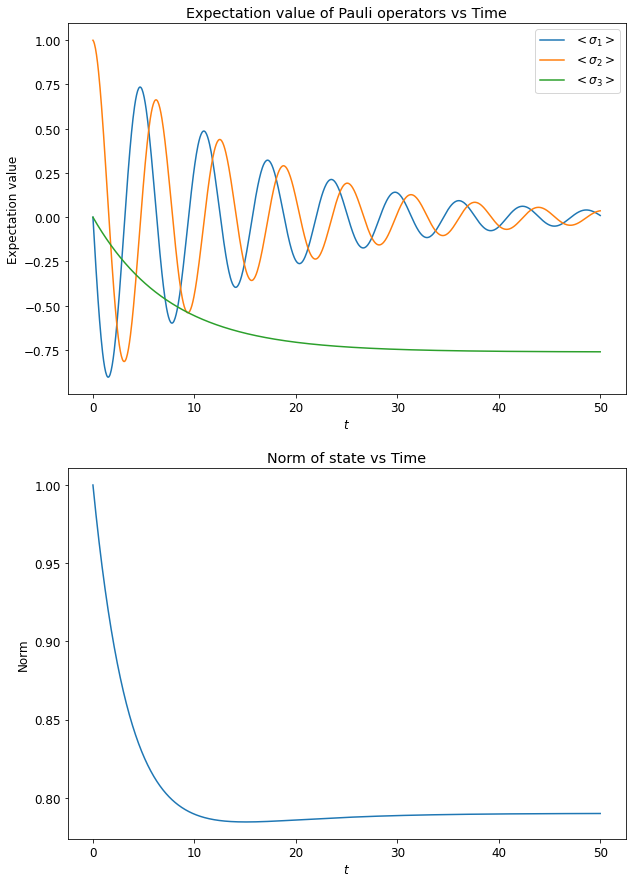

In [17]:
######################################################################################################
### This cell shows that the same answer is obtained if we instead vectorize using the Pauli basis ###
######################################################################################################

# Define the Hamiltonian and find the Liouvillian
# The Liouvillian form 4 is that used in 5
H = (h_bar*w0/2)*sig[3]
L_pauli = liouvillian_4(H)


U_pauli = expm(L_pauli*dt)



# Carry out the time evolution
t_axis, obs_exp, rho_end, norm = time_evo(U_pauli, rho_0, t_tot, dt, obs, basis = p_basis)

fig, ax = plt.subplots(2, figsize=(10, 15))

for i in range(len(obs)):
    ax[0].plot(t_axis, obs_exp[i], label = '$<\sigma_{%i}>$'%(i+1))
ax[0].set_xlabel('$ t $')
ax[0].set_ylabel('Expectation value')
ax[0].set_title('Expectation value of Pauli operators vs Time')
ax[0].legend()


ax[1].plot(t_axis, norm)
ax[1].set_xlabel('$ t $')
ax[1].set_ylabel('Norm')
ax[1].set_title('Norm of state vs Time')

plt.show()

6. Now let us numerically simulate the driven-dissipative qubit described by the interaction-picture master equation:
 $$\frac{{\rm d}}{{\rm d}t} \hat{\rho} = \frac{1}{{\rm i}\hbar} [ \hat{H},\hat{\rho}] + \gamma \mathcal{D}[\hat{\sigma}_-]\hat{\rho},$$ where $$\hat{H} = \frac{\hbar\Delta}{2} \hat{\sigma}_z + \frac{\hbar\Omega}{2}\hat{\sigma}_x.$$ Choose parameters $\gamma = 0.2\Omega$ and $\Delta = 0.05\Omega$ in the following.

(a) Construct the Liouvillian as a matrix and numerically simulate the interaction-picture evolution up to a time $\Omega t = 30$, starting from the initial condition $\rho(0) = |1\rangle\langle 1| = |\downarrow\rangle\langle \downarrow|$. Plot the components of the Bloch vector as a function of time. Check that the normalisation of the density matrix is conserved.

In [18]:
# Set the parameters for the question 
dt = 0.05
t_tot = 30
omega = 1
gamma = 0.2*omega
delta = 0.05*omega

In [19]:

def liouvillian_6(H, sig = sig, sig_plus = sig_plus, sig_minus = sig_minus,
                gamma = gamma, delta = delta, omega = omega, h_bar = h_bar):
    
    """
    Return the matrix form of the Liouvillian given in question 6, in the standard basis
    
    :param H ndarray: A matrix representing the associated Hamiltonian
    :param sig ndarray: An array whose components are the Pauli operators
    :param sig_plus ndarray: A matrix representing the Pauli + operator
    :param sig_minus ndarray: A matrix representing the Pauli - operator
    :param gamma ndarray: A constant associated with the systems Lindblad equation
    :param delta ndarray: A constant associated with the systems Lindblad equation
    :param omega ndarray: A constant associated with the systems Lindblad equation
    :param h_bar ndarray: A constant associated with the systems Lindblad equation
    
    :return ndarray: A ndarray representing matrix form of the Liouvillian operator in the standard basis
    """
    
    # Calculate the superoperator form of the Hamiltonian
    super_H = super_Ham(H)
    
    # Calculate the full Liouvillian
    L = (1/(1j*h_bar))*super_H + gamma*D(sig_minus)
    
    return L

Liouvillian:
[[-0.2+0.j    0. +0.1j   0. -0.1j   0. +0.j  ]
 [ 0. +0.1j  -0.1-0.05j  0. +0.j    0. -0.1j ]
 [ 0. -0.1j   0. +0.j   -0.1+0.05j  0. +0.1j ]
 [ 0.2+0.j    0. -0.1j   0. +0.1j   0. +0.j  ]]


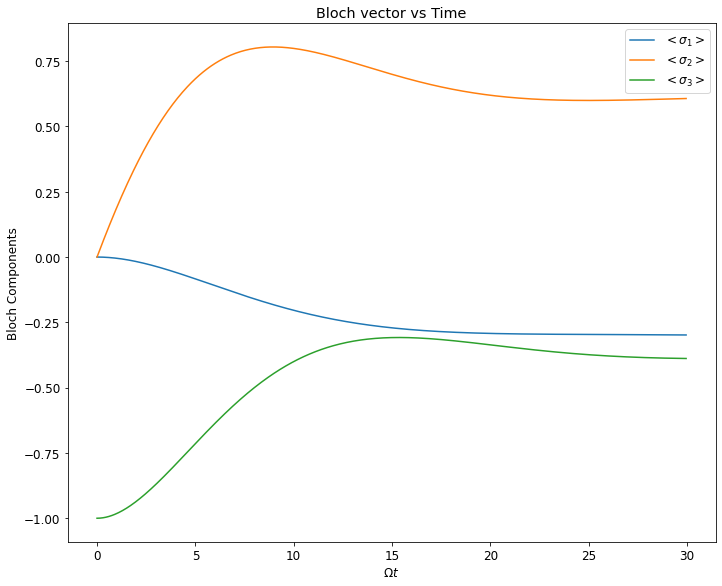

In [20]:
# Define the Hamiltonian for the question
H_6 = (0.5*h_bar*delta)*sig[3] + (0.5*h_bar*gamma)*sig[1]
# Calculate the Liouvillian
L_6 = liouvillian_6(H_6)
print(f'Liouvillian:\n{L_6}')

# Define the time evolution operator
U_dt_6 = expm(L_6*dt)

# Define the desired observables list
obs = sig[1:]
    
# Set the initial state
rho_0_6 = s1@s1.T.conjugate()

# Carry out the time evolution
t_axis, obs_exp, rho_end, _ = time_evo(U_dt_6, rho_0_6, t_tot, dt, obs)


fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
for i in range(len(obs)):
    ax.plot(t_axis[:-1], obs_exp[i][:-1], label = '$<\sigma_{%i}>$'%(i+1))
ax.set_xlabel('$ \Omega t$')
ax.set_ylabel('Bloch Components')
ax.set_title('Bloch vector vs Time')
ax.legend()
plt.show()


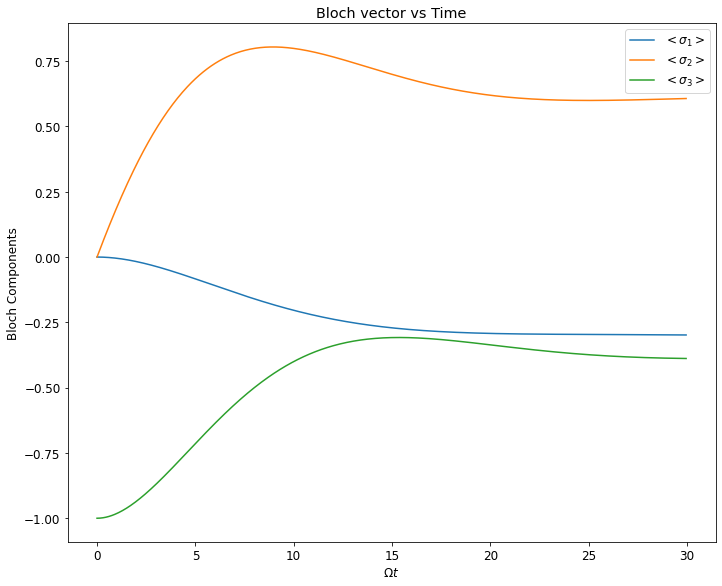

In [21]:
######################################################################################################
### This cell shows that the same answer is obtained if we instead vectorize using the Pauli basis ###
######################################################################################################

def liouvillian_6_pauli(H, basis = p_basis, sig_plus = sig_plus, sig_minus = sig_minus,
                        gamma = gamma, h_bar = h_bar):
    
    """
    Return the matrix form of the Liouvillian given in question 4
    
    :param H ndarray: A matrix representing the associated Hamiltonian
    :param basis ndarray: An array containing the vector components of the Pauli basis
    :param sig_plus ndarray: A matrix representing the Pauli + operator
    :param sig_minus ndarray: A matrix representing the Pauli - operator
    :param w0 ndarray: A constant associated with the systems Lindblad equation
    :param gamma ndarray: A constant associated with the systems Lindblad equation
    :param kT ndarray: A constant associated with the systems Lindblad equation
    :param h_bar ndarray: A constant associated with the systems Lindblad equation
    
    :return ndarray: A ndarray representing matrix form of the Liouvillian operator
    """
    
    # The shape of the Liouvillian will be dxd
    d = len(sig)
    # Initialise a matrix to store the matrix elememts of the Liouvillian
    L = np.zeros(d**2, dtype = complex).reshape(d, d)
    # For each basis element
    for i in range(d):
        ei = basis[i]
        # Loop over every other basis element and calculate the inner product of the first with 
        # the result of acting with the Liouvillian on the second
        for j in range(d):
            ej = basis[j]
            # Calculate the three terms in the Liouvillian
            t1 = (1/(1j*h_bar))*(H@ej - ej@H)
            t2 = gamma*D_p(sig_minus, ej)
            
            # Finally, take the trace to find the matrix element
            L[i, j] = np.trace(ei@(t1 + t2))
    
    return L

# Define the Liouvillian and time evolution operator in the Pauli basis
L_6_pauli = liouvillian_6_pauli(H_6)
U_6_pauli = expm(L_6_pauli*dt)


# Carry out the time evolution
t_axis, obs_exp, rho_end, norm = time_evo(U_6_pauli, rho_0_6, t_tot, dt, obs, basis = p_basis)

fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
for i in range(len(obs)):
    ax.plot(t_axis[:-1], obs_exp[i][:-1], label = '$<\sigma_{%i}>$'%(i+1))
ax.set_xlabel('$ \Omega t$')
ax.set_ylabel('Bloch Components')
ax.set_title('Bloch vector vs Time')
ax.legend()
plt.show()

plt.show()


(b) The two-time correlation function can be computed the quantum regression formula, e.g. $$\langle \hat{\sigma}_z(t+\tau)\hat{\sigma}_z(t)\rangle = {\rm tr}[\hat{\sigma}_z(t+\tau)\hat{\sigma}_z(t) \hat{\rho}(0)] = {\rm tr}[{\rm e}^{\mathcal{L}^\dagger \tau}(\hat{\sigma}_z)\hat{\sigma}_z \hat{\rho}(t)],$$ where $\hat{\rho}(t) = {\rm e}^{\mathcal{L}t}(\hat{\rho}(0))$ is the solution of the master equation. Calculate the above correlation function as a function of $\tau$ up to $\Omega\tau = 30$ for $t=0$ and $\Omega t=30$.

In [22]:
def correlation(U_dt, rho, tau_tot, d_tau, obs):
    """
    Return the correlation function given in part b)
    
    :param U_dt ndarray: A matrix representing time evolution operator
    :param rho ndarray: A matrix representing the density operator of the system
    :param tau_tot int: The total time over which the system is to be evolved
    :param d_tau float: The size of the time step increment 
    :param obs: The observable whose expectation value is to be calculated
    
    :return tau_axis ndarray: A ndarray containing the time value at each step in the evolution
    :return ndarray: A ndarray representing correlation function
    """
    # Initialise variables
    tau_steps = int(tau_tot/d_tau)  # Number of timesteps to take
    tau = 0.0                       # Initial state and time
    tau_axis = np.zeros(tau_steps+1)  # Time tau axis (n_steps+1 includes tau=0)  
    
    # Array to store the correlation values values at each time tau
    corr = np.zeros(tau_steps+1)
    
    # Vectorise the observable (this is the time dependent one)
    obs_vec = vectorise(obs)
    # obs_tau will be the time dependent observable in the standard basis 
    obs_tau = 0
    
    # Loop over timesteps tau
    for i in range(tau_steps):
        # Add the current timestep
        tau_axis[i] = tau
        # Convert the vectorized observable to the standard basis for computation of the correlation function
        obs_tau = obs_vec.reshape(2, 2)
        # Store the value of the correlation function of this given timestep
        corr[i] = np.real(np.trace(obs_tau@obs@rho))
        # Take a step forward in time
        obs_vec = U_dt@obs_vec
        tau += d_tau
        
    # Calculate at the final time tau_total
    tau_axis[-1] = tau
    # Convert the vectorized observable to the standard basis for computation of the correlation function
    obs_tau = obs_vec.reshape(2, 2)
    # Store the value of the correlation function of this given timestep
    corr[-1] = np.real(np.trace(obs_tau@obs@rho))    
    
    return tau_axis, corr

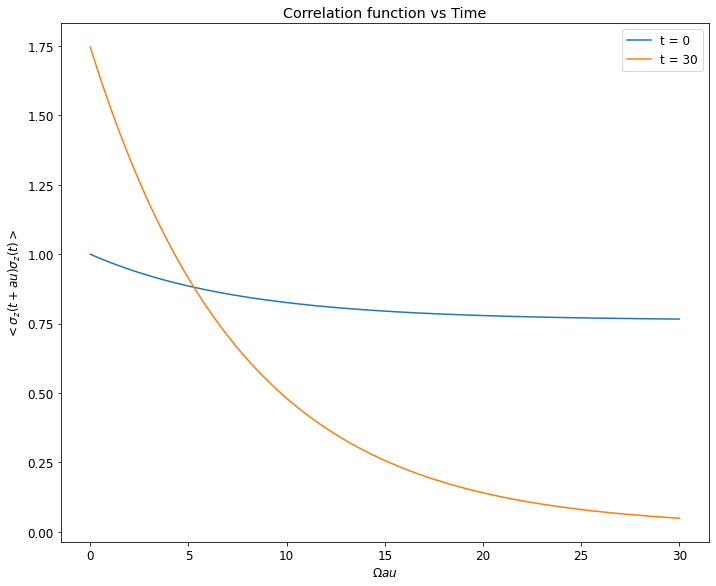

In [23]:
tau_tot = 30
d_tau = 0.05
obs = sig[3]

    
# Define the time evolition operator
L_dag = L.T.conjugate()
U_dt = expm(L_dag*d_tau)
    
rho_0 = s1@s1.T.conjugate()
_, _, rho_30, _ = time_evo(U_dt, rho_0, 30, 0.05, [obs])

states_list = [rho_0, rho_30.reshape(2, 2)]
t_list = [0, 30]
tau_list = []
corr_list = []

for state in states_list:
    tau, corr = correlation(U_dt, state, tau_tot, d_tau, obs)
    tau_list.append(tau)
    corr_list.append(corr)

fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
for i in range(len(states_list)):
    ax.plot(tau_list[i], corr_list[i], label = f't = {t_list[i]}')
ax.set_xlabel('$ \Omega \tau $')
ax.set_ylabel('$<\sigma_z (t+\tau)\sigma_z (t)>$')
ax.set_title('Correlation function vs Time')
ax.legend()
plt.show()

(c) Evaluate the steady-state emission spectrum 
$$ S(\omega) = \gamma \int_{-\infty}^\infty{\rm d}\tau \,\mathrm{e}^{\mathrm{i}\omega\tau} \langle \hat{\sigma}_+ (t+\tau)\hat{\sigma}_-(t)\rangle = 2\gamma \mathrm{Re} \int_{0}^\infty{\rm d}\tau \,\mathrm{e}^{\mathrm{i}\omega\tau} \langle \hat{\sigma}_+ (t+\tau)\hat{\sigma}_-(t)\rangle,$$
where $\mathrm{Re}$ denotes the real part. Here $t\to \infty$ so that $\hat{\rho}(t)$ is equal to the steady state. Plot the spectrum as a function of $\omega/\Omega$, ensuring that you choose an appropriate scale to see the main features. Briefly comment on the result. You may find the [Fast Fourier Transform](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.fft.fft.html#scipy.fft.fft) useful.

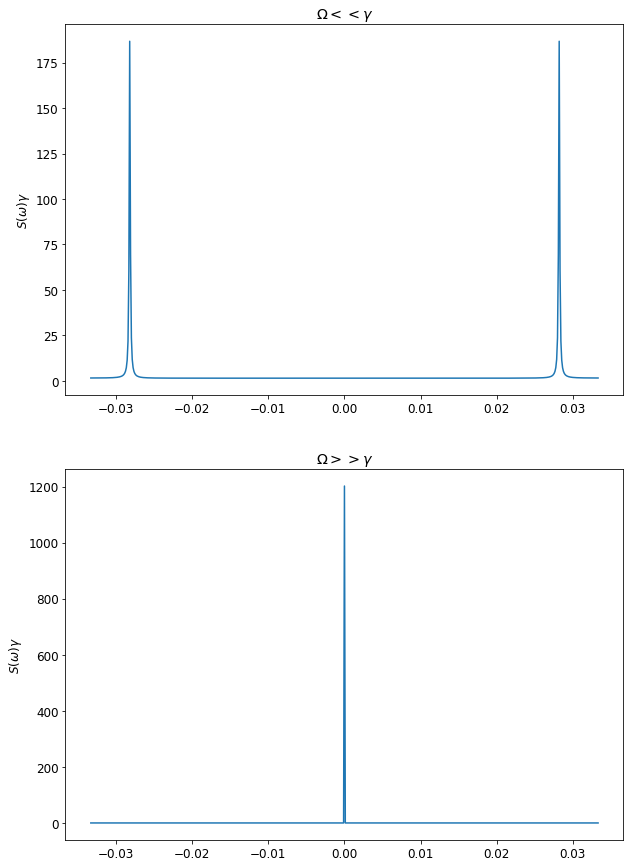

In [24]:
gamma_list = [10000, 0.00001]

fig, ax = plt.subplots(len(gamma_list), figsize=(10, 15))

for i in range(len(gamma_list)):
    gamma = gamma_list[i]*omega
    # Define the Hamiltonian 
    H = (0.5*h_bar*delta)*sig[3] + (0.5*h_bar*gamma)*sig[1]
    # Calculate the Liouvillian
    L = liouvillian_6(H)

    L_dag = L.T.conjugate()
    U_dt = expm(L_dag*d_tau)

    # Find the steady state
    eig_vals, eig_vecs = np.linalg.eig(L)

    steady_index = np.where(np.round(eig_vals, 10) == 0)[0][0]
    ss = eig_vecs[:, steady_index]

    # Convert to standard basis
    ss = ss.reshape(2, 2)

    # Calculate the correlation function for the steady state
    tau, corr = correlation(U_dt, ss, tau_tot, d_tau, obs)

    freq = np.linspace(-1/30, 1/30, 601)

    s = 2*gamma*np.real(fftshift(fft(corr)))/gamma
    ax[i].plot(freq, s)
    ax[i].set_ylabel('$S(\omega)\gamma$')
ax[0].set_title('$\Omega << \gamma$')
ax[1].set_title('$\Omega >> \gamma$')

plt.show()


7. Now let us simulate the quantum-jump trajectories for the master equation of question 6 describing a driven-dissipative qubit. Recall that this method involves simulating the dynamics of an *unnormalised* pure state $$ |\tilde{\psi}(t)\rangle = {\rm e}^{-{\rm i}\hat{H}_{\rm eff}t/\hbar}|\psi(0)\rangle,$$ where  the non-Hermitian Hamiltonian is $$ \hat{H}_{\rm eff} = \hat{H} -\frac{{\rm i \hbar\gamma }}{2} \hat{\sigma}_+\hat{\sigma}_-.$$ The waiting time distribution describing photon emissions, $W(t) = -{\rm d}P_0/{\rm d} t$, can then be sampled using the expression for the survival probability, $P_0(t) = \langle \tilde{\psi}(t)|\tilde{\psi}(t)\rangle.$

(a) As a warm-up, set $\Delta = \Omega = 0$ and consider the initial state $\hat{\rho}(0) = |0\rangle\langle 0| = |\uparrow\rangle\langle \uparrow|$. Derive an analytical expression for the waiting-time distribution for photon emissions.

(b) Numerically sample the waiting-time distribution by evolving the initial state under the non-Hermitian Hamiltonian, discretising time in small steps $\Delta t$ such that
$$ |\tilde{\psi}(t+\Delta t)\rangle = {\rm e}^{-{\rm i}\hat{H}_{\rm eff}\Delta t /\hbar}|\tilde{\psi}(t)\rangle.$$
Plot a histogram of the numerically obtained $W(t)$ as a function of $\gamma t$ for 200 trajectories, and quantitatively compare it with your analytical result. 

In [25]:
# Set the parameters of the question
delta = 0
omega = 0
gamma = 1

In [26]:
def jump_evo_single(U_dt, phi_0, t_tot, dt, n_traj, delta = delta, omega = omega, gamma = gamma,
               sig_minus = sig_minus, h_bar = h_bar):
        
    """
    Evolve an initial state rho_0 according to the evolution operator U_dt, allowing only
        a single jump per trajectory

    :param U_dt ndarray: A matrix representing the time evolution opertaor
    :param phi_0 ndarray: A matrix representing the initial state of the system
    :param t_tot int: The total time over which the system is to be evolved
    :param dt float: The size of the time step increment 
    :param n_traj int: The number of trajectories to carry out
    :param delta ndarray: A constant associated with the Hamiltonian
    :param omega ndarray: A constant associated with the Hamiltonian
    :param gamma ndarray: A constant associated with the Hamiltonian
    :param sig_minus ndarray: A matrix representing the Pauli - operator
    :param h_bar ndarray: A constant associated with the Hamiltonian
    :return waiting_times list: A list of waiting times which occurred throughout the evoluton of 
        the n_traj trajectories
    """
    
    # Initialise variables
    n_steps = int(t_tot/dt) + 1  # Number of timesteps to take
    waiting_times = []    # A list to store the observed waiting times
    
    # Loop over the number of trajectories
    for i in range(n_traj):
        # Reset the state for each trajectory
        phi = phi_0
        # Set a random number which will be used to dertermine whether a jump has occurred or not
        r = random()
        # Loop over time steps
        for j in range(n_steps):
            # prob is the 'no detection' probability after j timesteps
            prob = phi.T.conjugate()@phi
            # Assume that emission has occured once this value hits 1-r
            if prob <= (1-r):
                # Apply jump operator and normalise
                phi = sig_minus@phi
                phi = phi/(phi.T.conjugate()@phi)
                # Add this waiting time to the list of waiting times
                waiting_times.append(j*dt)
                # When a jump occurs, end the trajectory
                break
            # Evolve the state in time
            phi = U_dt@phi
                
    return waiting_times

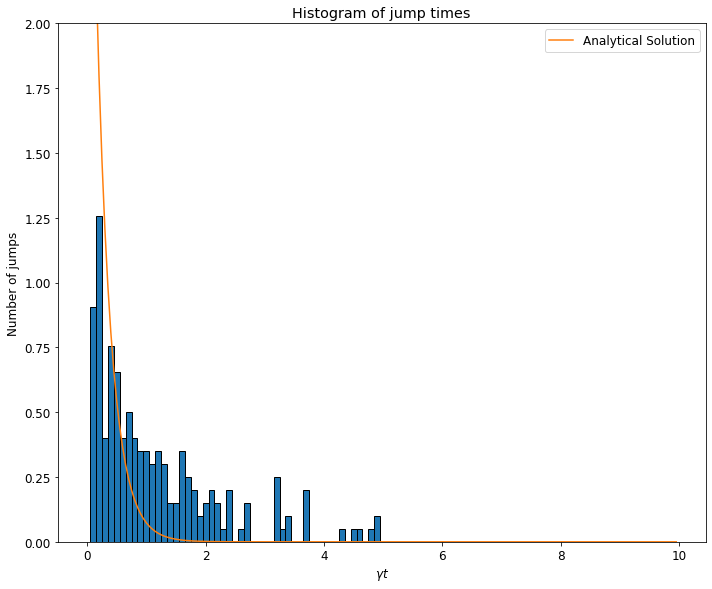

In [27]:
# Set the Hamiltonian and effective Hamiltonian for the system
H = (h_bar*delta/2)*sig[3] + (h_bar*omega/2)*sig[1]
H_eff = H - (1j*h_bar*gamma/2)*(sig_plus@sig_minus)

# Define the time evolution operator
U_dt = expm(-1j*H_eff*dt)
# Set the initial state
phi_0 = s0.copy()
# Define the evolution parameters
t_tot = 10
dt = 0.05
n_traj = 200

# Evolve the sytsem and store the resulting waiting times
waiting_times = np.array(jump_evo_single(U_dt, phi_0, t_tot, dt, n_traj))
t = np.arange(0, t_tot, dt)

fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
# Plot the histogram of the simulated waiting times
# with bins spaced by dt
ax.hist(waiting_times, bins = np.arange(min(waiting_times), max(waiting_times), 2*dt), density=True, ec='black')
# Plot the analytical solution obtained in part a) for comparison
ax.plot(t, 4*gamma*np.exp(-4*gamma*t), label = 'Analytical Solution')
ax.set_xlabel('$\gamma t$')
ax.set_ylabel('Number of jumps')
ax.set_title('Histogram of jump times')
ax.set_ylim(0, 2)
ax.legend()
plt.show()

In [28]:
delta = 0
omega = 0
gamma = 1


def jump_evo_multi(U_dt, rho_0, t_tot, dt, n_traj, delta = delta, omega = omega, gamma = gamma,
               sig_minus = sig_minus, h_bar = h_bar):
    
    """
    Evolve an initial state rho_0 according to the evolution operator U_dt, allowing multiple
        jumps per trajectory

    :param U_dt ndarray: A matrix representing the time evolution opertaor
    :param rho_0 ndarray: A matrix representing the initial state of the system
    :param t_tot int: The total time over which the system is to be evolved
    :param dt float: The size of the time step increment 
    :param n_traj int: The number of trajectories to carry out
    :param delta ndarray: A constant associated with the Hamiltonian
    :param omega ndarray: A constant associated with the Hamiltonian
    :param gamma ndarray: A constant associated with the Hamiltonian
    :param sig_minus ndarray: A matrix representing the Pauli - operator
    :param h_bar ndarray: A constant associated with the Hamiltonian
    :return waiting_times list: A list of waiting times which occurred throughout the evoluton of 
        the n_traj trajectories
    """
    
        # Initialise variables
    n_steps = int(t_tot/dt) + 1  # Number of timesteps to take
    waiting_times = []    # A list to store the observed waiting times
    
    # Initialise variables
    n_steps = int(t_tot/dt) + 1  # Number of timesteps to take
    waiting_times = []        # A list to store the observed waiting times
    
    # Loop over the number of trajectories
    for i in range(n_traj):
        # Reset the state for each trajectory
        rho = rho_0
        r = random()
        # Store time index of the previous jump
        prev_jump = 0
        # Loop over time steps
        for j in range(n_steps):
            # prob is the 'no detection' probability after j timesteps
            prob = np.trace(rho)
            # Assume that emission has occured once this value hits 1-r
            if prob <= (1-r):
                # Apply jump operator and normalise
                rho = sig_minus@rho@sig_minus.T.conjugate()
                rho = rho/(np.trace(rho))
                # Add this waiting time to the list of waiting times
                waiting_times.append(j*dt - prev_jump*dt)
                prev_jump = j
                # Set a new value of r to continue evolution for this trajectory
                r = random()
            # Evolve the state in time
            rho = U_dt@rho@U_dt.T.conjugate()
                
    return waiting_times

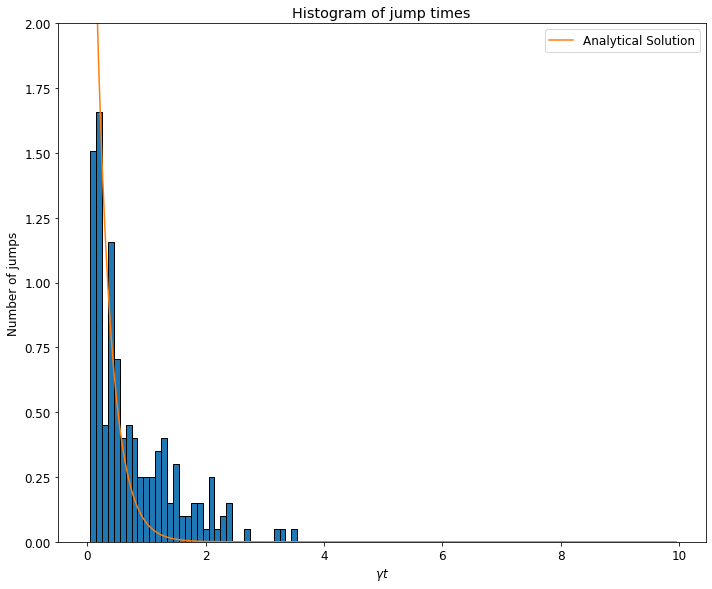

In [29]:
# Set the Hamiltonian and effective Hamiltonian for the system
H = (h_bar*delta/2)*sig[3] + (h_bar*omega/2)*sig[1]
H_eff = H - (1j*h_bar*gamma/2)*(sig_plus@sig_minus)

# Define the time evolution operator
U_dt = expm(-1j*H_eff*dt)
# Set the initial state
rho_0 = s0@s0.T.conjugate()
# Define the evolution parameters
t_tot = 10
dt = 0.05
n_traj = 200

# Evolve the sytsem and store the resulting waiting times
waiting_times = np.array(jump_evo_multi(U_dt, rho_0, t_tot, dt, n_traj))
t = np.arange(0, t_tot, dt)

fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
# Plot the histogram of the simulated waiting times
# with bins spaced by dt
ax.hist(waiting_times, bins = np.arange(min(waiting_times), max(waiting_times), 2*dt), density=True, ec='black')
# Plot the analytical solution obtained in part a) for comparison
ax.plot(t, 4*gamma*np.exp(-4*gamma*t), label = 'Analytical Solution')
ax.set_xlabel('$\gamma t$')
ax.set_ylabel('Number of jumps')
ax.set_title('Histogram of jump times')
ax.set_ylim(0, 2)
ax.legend()
plt.show()

(c) Now extend this to the general case where $\Omega\neq 0$, so that multiple emissions can occur within a single trajectory. Choose parameters $\Delta = 0.05\Omega$ and $\gamma = 0.2\Omega$, take the initial condition $\rho(0) = |1\rangle\langle 1| = |\downarrow\rangle\langle \downarrow|$, and simulate up to a time $\Omega t=30$. You will now need to account for the change of state when an emission occurs:
$$|\tilde{\psi}\rangle\longrightarrow \frac{\hat{\sigma}_- |\tilde{\psi}\rangle}{\lvert\!\lvert \hat{\sigma}_- |\tilde{\psi}\rangle\rvert\!\rvert^2} = |\downarrow\rangle.$$
Compute the conditional expectation value of $\sigma_z$ along a single trajectory: $$\langle \hat{\sigma}_z\rangle = \frac{\langle \tilde{\psi}|\hat{\sigma}_z|\tilde{\psi}\rangle}{\langle \tilde{\psi}|\tilde{\psi}\rangle},$$
where the denominator accounts for the loss of normalisation. Plot these conditional expectation values as a function of time for three different random trajectories.

In [30]:
omega = 1
delta = 0.05*omega
gamma = 0.2*omega


def jump_evo_c(U_dt, phi_0, t_tot, dt, n_traj, obs, delta = delta, omega = omega, gamma = gamma,
               sig_minus = sig_minus, h_bar = h_bar):
    """
    Evolve an initial state rho_0 according to the evolution operator U_dt

    :param U_dt ndarray: A matrix representing the time evolution opertaor
    :param phi_0 ndarray: A matrix representing the initial state of the system
    :param t_tot int: The total time over which the system is to be evolved
    :param dt float: The size of the time step increment 
    :param n_traj int: The number of trajectories to carry out
    :param obs ndarray: The matrix representation of the observable to calculate
    :param delta ndarray: A constant associated with the Hamiltonian
    :param omega ndarray: A constant associated with the Hamiltonian
    :param gamma ndarray: A constant associated with the Hamiltonian
    :param sig_minus ndarray: A matrix representing the Pauli - operator
    :param h_bar ndarray: A constant associated with the Hamiltonian
    :return waiting_times list: A list of waiting times which occurred throughout the evoluton of 
        the n_traj trajectories
    """
    # Initialise variables
    n_steps = int(t_tot/dt)  # Number of timesteps to take
    obs_exp = np.zeros([n_traj,n_steps+1]) # Time axis and observable expectation values
    t_axis = np.arange(0, t_tot+dt, dt)
    
    for i in range(n_traj):
        # Reset the state for each trajectory
        phi = np.array([[0], [1]])
        r = random()
        # Loop over trajectories
    
        for j in range(n_steps):
            # This is the 'no detection' probability after j timesteps
            # Assume that emission has occured once this value hits 1-r
            prob = phi.T.conjugate()@phi
            # Assume that emission has occured once this value hits 1-r
            if prob <= (1-r):
                # Apply jump operator and normalise
                
                phi = sig_minus@phi
                phi = phi/(phi.T.conjugate()@phi)
                
                # Add this waiting time to the waiting times
                # Set a new value of r to continue evolution
                r = random()
            # Compute and store the observable value at this timestep
            obs_exp[i, j] = np.real((phi.T.conjugate()@obs@phi)/(phi.T.conjugate()@phi))
            # Evolve the state
            phi = U_dt@phi
    
        obs_exp[i, -1] = np.real((phi.T.conjugate()@obs@phi)/(phi.T.conjugate()@phi))
                
    return t_axis, obs_exp

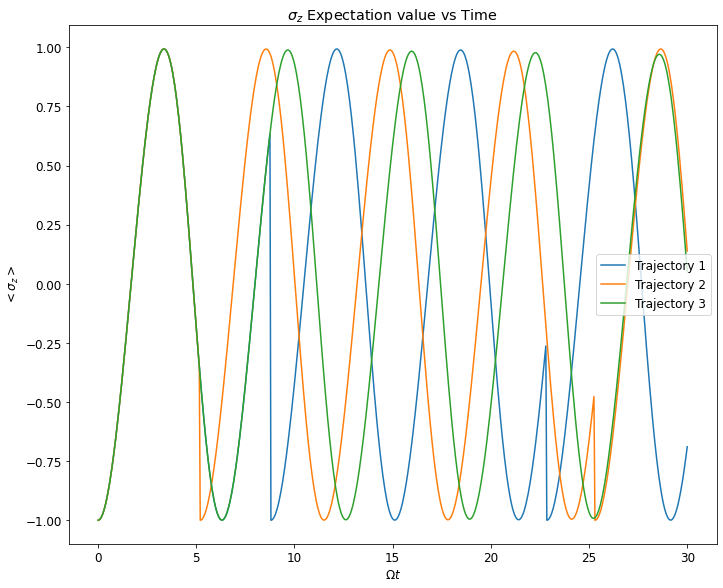

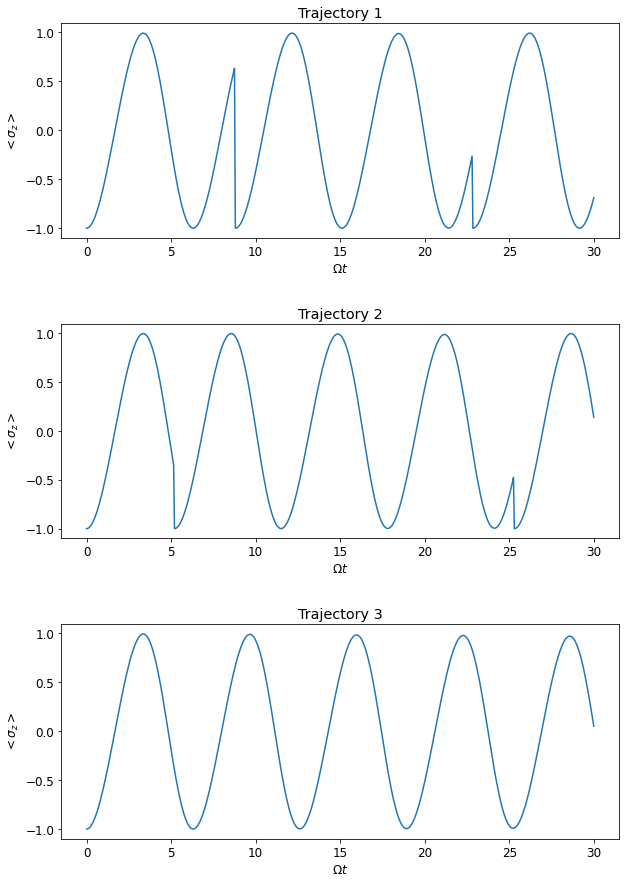

In [31]:
# Set the Hamiltonian and effective Hamiltonian for the system
H = (h_bar*delta/2)*sig[3] + (h_bar*omega/2)*sig[1]
H_eff = H - (1j*h_bar*gamma/2)*(sig_plus@sig_minus)

# Define the time evolution operator
U_dt = expm(-1j*H_eff*dt)
# Set the initial state
phi_0 = s1.copy()
# Define the evolution parameters
t_tot = 30
dt = 0.05
n_traj = 3

# Evolve the sytsem and store the time array and expectation values
time, obs_exp = jump_evo_c(U_dt, phi_0, t_tot, dt, n_traj, sig[3])


fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
for i in range(n_traj):
    ax.plot(time, obs_exp[i], label = f'Trajectory {i+1}')
ax.set_xlabel('$\Omega t$')
ax.set_ylabel('$< \sigma_z >$')
ax.set_title('$\sigma_z$ Expectation value vs Time')
ax.legend()
plt.show()


fig, ax = plt.subplots(n_traj, figsize=(10, 15))
fig.subplots_adjust(hspace=0.4)

for i in range(n_traj):
    ax[i].plot(time, obs_exp[i])
    ax[i].set_xlabel('$\Omega t$')
    ax[i].set_ylabel('$< \sigma_z >$')
    ax[i].set_title(f'Trajectory {i+1}')
plt.show()



(d) Simulate 100 trajectories up to a time $\Omega t=30$ and average over the results. Plot the average expectation $\langle \hat{\sigma}_z\rangle$ obtained from the trajectories as a function of time, and show your numerical solution for $\langle \hat{\sigma}_z\rangle$ from question 6 on the same axes. Write a couple of sentences comparing the two results. 

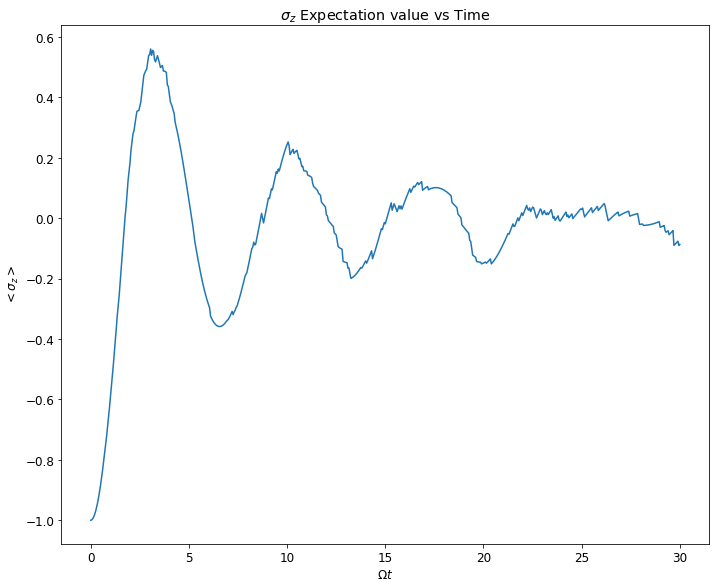

In [32]:
# Define the total time and trajectory number
t_tot = 30
n_traj = 100

# Evolve the sytsem and store the time array and expectation values
time, obs_exp = jump_evo_c(U_dt, phi_0, t_tot, dt, n_traj, sig[3])
# Calculate the average over each trajectory at each time step
avg_obs = np.mean(obs_exp, axis = 0)

# Plot the results
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(time, avg_obs)
ax.set_xlabel('$\Omega t$')
ax.set_ylabel('$< \sigma_z >$')
ax.set_title('$\sigma_z$ Expectation value vs Time')
plt.show()

8. Consider the anharmonic oscillator with Hamiltonian given in the interaction picture by $$ \hat{H} = \hbar\Delta \hat{a}^\dagger\hat{a} + \hbar U\hat{a}^\dagger \hat{a}^\dagger \hat{a}\hat{a} + \frac{\hbar F}{2} (\hat{a} + \hat{a}^\dagger),$$ where $\Delta$ is the detuning of the drive from resonance, $U$ quantifies the anharmonicity and $F$ is the drive strength (the rotating wave approximation has been invoked). The system undergoes dissipation described by the Lindblad equation $$\frac{\rm d}{{\rm d}t} \hat{\rho} = \frac{1}{{\rm i}\hbar} [\hat{H},\hat{\rho}] + \gamma\mathcal{D}[\hat{a}]\hat{\rho}.$$ Find the steady state numerically and make a contour plot of its Husimi Q-function for $\Delta =0$ and $\gamma = 0.3F$, and with three values of anharmonicity: $U =0$, $U=0.1F$ and $U=F$. Comment briefly on the nature of the steady state in each case.

In [33]:
d = 4
F = 1
delta = 0
gamma = 0.3*F
U_list = [0, 0.1*F, F]

In [34]:
def an_op(d):
    """
    Generate the annihilation operator in a truncated d-dimensional space

    :param int d: The dimensionality of the space
    :return: ndarray of size dxd representing a truncated d-dimensional annihilation operator
    """
        
    # Generate the upper diagonal of the matrix
    values = [np.sqrt(nn) for nn in range(1,d)]
    # Place these values on the first diagonal above the main diagonal
    upper_diagonal=1
    
    return np.diag(values,upper_diagonal)

def disp_op(alpha,d):
    """
    Generate the displacement operator in a truncated d-dimensional space for value alpha

    :param complex alpha: The complex number characterising the coherent state
    :param int d: The dimensionality of the space
    :return: ndarray of size dxd representing a truncated d-dimensional displacement operator
    """
    A = an_op(d)
    Adag = A.T.conj()
    exponent = np.conj(alpha)*Adag- alpha*A
    return expm(exponent)

def Ham(d, delta, U, F, h_bar = 1):
    """
    Generate the Hamiltonian operator in a truncated d-dimensional space

    :param int d: The dimensionality of the space
    :param float delta: A constant associated with the Hamiltonian
    :param float U: A constant associated with the Hamiltonian
    :param float F: A constant associated with the Hamiltonian
    :return: ndarray of size dxd representing a truncated d-dimensional Hamiltonian operator
    """
    a = an_op(d)
    a_dag = a.T.conjugate()
    
    H = h_bar*delta*a_dag@a + h_bar*U*a_dag@a_dag@a@a + (h_bar*F/2)*(a + a_dag)
    
    return H

def fock_state(n, d):
    """
    Create the Fock state |n> in a d dimensional space

    :param int n: the number of the Fock state to be created
    :param int d: the dimension of the space in which the fock state will exist
    :return: ndarray representing the Fock state |n>
    """
    fock = np.zeros(d)
    fock[n] = 1
       
    return fock.reshape(-1, 1)
    
def coh_state(alpha, d):
    """
    Generate a coherent state in a truncated d-dimensional space for value alpha

    :param complex alpha: The complex number characterising the coherent state
    :param int d: The dimensionality of the space
    :return: ndarray of size dx1 representing a truncated d-dimensional coherent state
    """
    ground = fock_state(0, d)
    disp = disp_op(alpha,d)
    
    return disp@ground

def liouvillian_8(H, gamma, h_bar = 1):
    """
    Generate the Liouvillian operator in a truncated d-dimensional space

    :param ndarray H: The Hamiltonian operator within the Liouvillian
    :return: ndarray of size dxd representing a truncated d-dimensional Liouvillian operator
    """
    d = H.shape[0]
    
    a = an_op(d)
    a_dag = a.T.conjugate()
    
    super_H = super_Ham(H)
    
    L = (1/1j*h_bar)*super_H + gamma*(M_L(a)@M_R(a_dag) - 0.5*(M_L(a_dag)@M_L(a) + M_R(a)@M_R(a_dag)))
    
    return L

def husimi(alpha, rho):
    """
    Calculate the value of the Husimi Q funciton for value alpha and state rho

    :param complex alpha: The complex number characterising the coherent state
    :param ndarray rho: The state for which the function is to be calculated
    :return complex: Value of the Husimi Q function for the given arguements
    """
    # Dimensionality
    d = rho.shape[0]
    
    alpha_ket = coh_state(alpha, d)
    alpha_bra = alpha_ket.T.conjugate()
    q = (1/np.pi)*alpha_bra@rho@alpha_ket
    
    return q[0, 0]
    
def steady_state(U, d, F = F, delta = delta, gamma = gamma):
    """
    Calculate the value of the steady state vector
    :param float U: A constant associated with the Hamiltonian in question 8
    :param int d: The dimensionality of the space in which the calculation is done
    :param float delta: A constant associated with the Hamiltonian in question 8
    :param float gamma: A constant associated with the Hamiltonian in question 8
    :return ndarray: A vector representing the steady state solution for thei given choice of parameters
    """
    H = Ham(d, delta, U, F)
    L = liouvillian_8(H, gamma)
    
    eig_vals, eig_vecs = np.linalg.eig(L)
    
    steady_index = np.where(np.round(eig_vals, 10) == 0)[0][0]
    ss = eig_vecs[:, steady_index]

    # Convert to standard basis
    ss = ss.reshape(d, d)
    
    return ss
    

In [41]:
def plot_husimi(U_list, d):
    
    """
    Return the value of the Q function for an arbitrary value of alpha and state rho
    This funciton uses a pure density matrix of the state rho

    :param complex alpha: The complex arguement of the Q function
    :param ndarray phi: a dx1 dimensional ndarray representing a state vector
    :return: complex value of the function
    """
    
    # Limit of the real and complex values over which to plot
    lim = 20
    # The number of increments for plotting
    n = 100
    
    xlist = np.linspace(-lim, lim, n)
    ylist = np.linspace(-lim, lim, n)
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros(len(xlist)*len(ylist)).reshape(len(ylist), len(xlist))
        
    fig, ax = plt.subplots(len(U_list), figsize=(20,30))
        
    for u in range(len(U_list)):
        
        # Calculate steady state for particular value of U
        rho = steady_state(U_list[u], d)
        
        ax[u].set_title(f'U = {U_list[u]}')
        ax[u].set_xlabel('Re $alpha$')
        ax[u].set_ylabel('Im $alpha$')
    
        
        for i in range(len(ylist)):
            for j in range(len(xlist)):
                Z[i, j] = np.real(husimi(xlist[j] + ylist[i]*1.0j, rho))
        cp = ax[u].contourf(X, Y, Z)
        fig.colorbar(cp, ax = ax[u]) # Add a colorbar to a plot
    
    fig.suptitle('Contour Plot')
    plt.show()

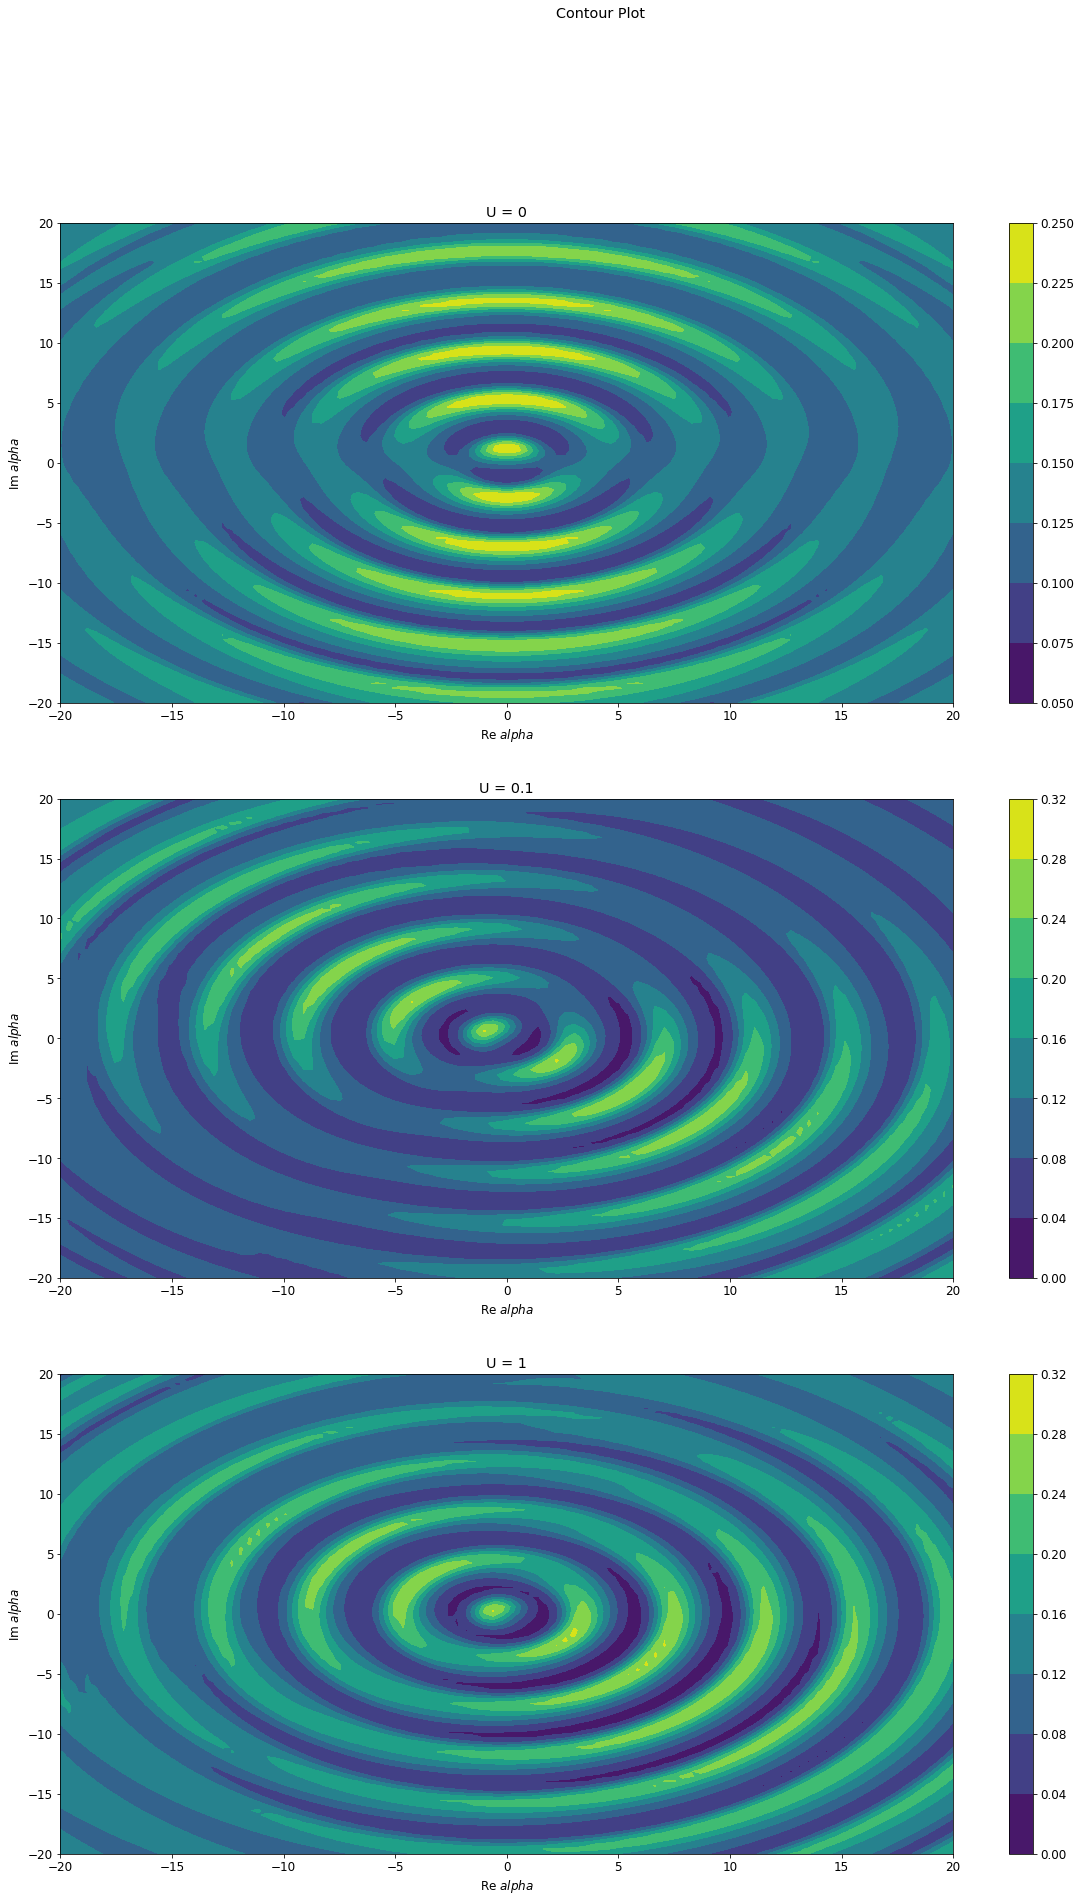

In [42]:
d = 16
F = 1
delta = 0
gamma = 0.3*F
U_list = [0, 0.1*F, F]


plot_husimi(U_list, d)